In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests #html requests
from bs4 import BeautifulSoup #parse html documents
import re

## Braves

In [2]:
#scrape wikipedia for win/loss data

wikiurl="https://en.wikipedia.org/wiki/List_of_Atlanta_Braves_seasons"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl, verify=False)
print(response.status_code)

/home/james/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


200


In [3]:
#parse data from html

soup = BeautifulSoup(response.text, 'html.parser')
bravestable=soup.find('table',{'class':"wikitable plainrowheaders"})

In [4]:
#read data into pandas dataframe

braves=pd.read_html(str(bravestable))
braves=pd.DataFrame(braves[0])
print(braves.head())

              MLBseason            Teamseason                League  \
0  Boston Red Stockings  Boston Red Stockings  Boston Red Stockings   
1                  1871                  1871                   NaN   
2                  1872                  1872                  NA *   
3                  1873                  1873                  NA *   
4                  1874                  1874                  NA *   

               Division                Finish                  Wins  \
0  Boston Red Stockings  Boston Red Stockings  Boston Red Stockings   
1                   NaN                   3rd                    20   
2                   NaN                   1st                    39   
3                   NaN                   1st                    43   
4                   NaN                   1st                    52   

                 Losses                  Win%                    GB  \
0  Boston Red Stockings  Boston Red Stockings  Boston Red Stockings   
1   

In [5]:
#clean data

#filter down to relevant rows

braves = braves[braves.index > 104]
braves = braves[braves.index < 161]

In [6]:
#filter down to relevant columns

braves.drop(['MLBseason', 'League', 'Division', 'Finish', 'GB', 'Postseason', 'Awards', 'Wins', 'Losses'], 
            axis=1, inplace=True)

#rename column for convenience

braves = braves.rename(columns = {'Teamseason': 'Season',
                                 'Win%': 'Braves Wins'})

In [7]:
#convert to appropriate data types
braves['Braves Wins'] = braves['Braves Wins'].astype(float)
braves['Season'] = braves['Season'].astype(int)

In [8]:
braves.head()

,Season,Braves Wins
105,1966,0.525
106,1967,0.475
107,1968,0.500
108,1969,0.574
109,1970,0.469


In [9]:
braves.dtypes

Season           int64
Braves Wins    float64
dtype: object

## Falcons

In [10]:
#scrape wikipedia for win/loss data

wikiurl="https://en.wikipedia.org/wiki/List_of_Atlanta_Falcons_seasons"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl, verify=False)
print(response.status_code)

/home/james/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


200


In [11]:
#parse data from html

soup = BeautifulSoup(response.text, 'html.parser')
falconstable=soup.find_all('table',{'class':"wikitable"})[1]

In [12]:
#read data into pandas dataframe

falcons=pd.read_html(str(falconstable))
falcons=pd.DataFrame(falcons[0])
print(falcons.head())

  Season  Team League Conference Division Regular season  \
  Season  Team League Conference Division         Finish   
0   1966  1966    NFL    Eastern        —            7th   
1   1967  1967    NFL    Western  Coastal            4th   
2   1968  1968    NFL    Western  Coastal            4th   
3   1969  1969    NFL    Western  Coastal            3rd   
4   1970  1970    NFL        NFC     West            3rd   

                                                                            \
  .mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W   
0                                                  3                         
1                                                  1                         
2                                                  2                         
3                                                  6                         
4                                                  4                         

         Postseason results     

In [13]:
#clean data

#filter down to relevant columns

falcons.drop(['Season', 'League', 'Conference', 'Division', 'Postseason results', 'Awards', 'Head coaches'], 
             axis=1, inplace=True)

/home/james/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [14]:
#remove multiindex

falcons.columns = falcons.columns.get_level_values(1)

In [15]:
#filter irrelevant columns and rename colums for convenience
falcons.drop(['Finish', 'T'], axis=1, inplace=True)
falcons = falcons.rename(columns={'.mw-parser-output .tooltip-dotted{border-bottom:1px dotted;cursor:help}W': 'W',
                                 'Team' : 'Season'})

#Calculate Win%

falcons['Win%'] = falcons['W'] / (falcons['W'] + falcons['L'])
falcons.drop(['W', 'L'], axis=1, inplace=True)

falcons = falcons.rename(columns={'Win%' : 'Falcons Wins'})

In [16]:
#convert to appropriate data types
falcons['Season'] = falcons['Season'].astype(int)

In [17]:
falcons.head()

,Season,Falcons Wins
0,1966,0.214286
1,1967,0.076923
2,1968,0.142857
3,1969,0.428571
4,1970,0.333333


In [18]:
falcons.dtypes

Season            int64
Falcons Wins    float64
dtype: object

## Hawks

In [19]:
#scrape wikipedia for win/loss data

wikiurl="https://en.wikipedia.org/wiki/List_of_Atlanta_Hawks_seasons"
table_class="wikitable sortable jquery-tablesorter"
response=requests.get(wikiurl, verify=False)
print(response.status_code)

/home/james/anaconda3/lib/python3.8/site-packages/urllib3/connectionpool.py:1013: InsecureRequestWarning: Unverified HTTPS request is being made to host 'en.wikipedia.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


200


In [20]:
#parse data from html

soup = BeautifulSoup(response.text, 'html.parser')
hawkstable=soup.find_all('table',{'class':"wikitable"})[2]

In [21]:
#read data into pandas dataframe

hawks=pd.read_html(str(hawkstable))
hawks=pd.DataFrame(hawks[0])
print(hawks.head())

                                   Season  \
                                   Season   
0  Buffalo Bisons / Tri-Cities Blackhawks   
1                              1946–47[b]   
2                   Tri-Cities Blackhawks   
3                                 1947–48   
4                                 1948–49   

                                   League  \
                                   League   
0  Buffalo Bisons / Tri-Cities Blackhawks   
1                                     NBL   
2                   Tri-Cities Blackhawks   
3                                     NBL   
4                                     NBL   

                           Regular Season  \
                               Conference   
0  Buffalo Bisons / Tri-Cities Blackhawks   
1                                       —   
2                   Tri-Cities Blackhawks   
3                                       —   
4                                       —   

                                           \
       

In [22]:
#clean data

#remove multiindex

hawks.columns = hawks.columns.get_level_values(1)

In [23]:
#filter down to relevant rows

hawks = hawks[hawks.index > 26]

In [24]:
#filter down to relevant colums

hawks.drop(['League', 'Conference', 'Finish', 'Division', 'Finish.1', 'GB', 'Playoffs', 'Awards',
           'Unnamed: 12_level_1', 'Unnamed: 13_level_1', 'Unnamed: 14_level_1', 'Wins', 'Losses'], axis=1, inplace=True)

In [25]:
#change seasons to single year for easy comparison

hawks['Season'] = hawks['Season'].str.extract('^(\d{4})')

In [26]:
#rename column to 'Hawks Wins'

hawks = hawks.rename(columns={'Win%' : 'Hawks Wins'})

In [27]:
#convert to appropriate data types

hawks['Hawks Wins'] = hawks['Hawks Wins'].astype(float)
hawks['Season'] = hawks['Season'].astype(int)

In [28]:
hawks.head()

,Season,Hawks Wins
27,1968,0.585
28,1969,0.585
29,1970,0.439
30,1971,0.439
31,1972,0.561


In [29]:
hawks.dtypes

Season          int64
Hawks Wins    float64
dtype: object

## ATL Sports

In [30]:
#merge dataframes

atl = braves.merge(falcons, 'outer', on='Season').merge(hawks, 'outer', on='Season')

In [31]:
#remove years with incomplete data

atl = atl[atl.index > 1]
atl = atl[atl.index < 55]

In [32]:
#make 'Season' the index
atl.set_index('Season', inplace=True)

In [33]:
#Calculate 10-year rolling average

atl['Braves'] = atl['Braves Wins'].rolling(window=10, min_periods=1, center=True).mean()
atl['Falcons'] = atl['Falcons Wins'].rolling(window=10, min_periods=1, center=True).mean()
atl['Hawks'] = atl['Hawks Wins'].rolling(window=10, min_periods=1, center=True).mean()

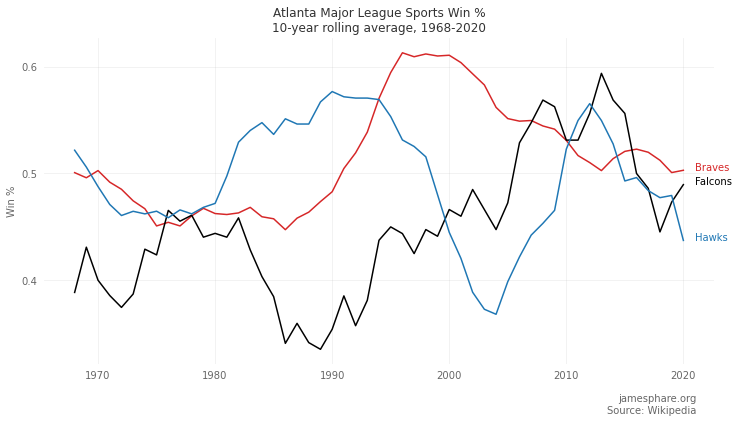

In [74]:
fig = plt.figure(figsize=(12, 6), facecolor="white")
plt.plot(atl['Braves'], color='tab:red')
plt.plot(atl['Falcons'], color='black')
plt.plot(atl['Hawks'], color='tab:blue')

#add labels to ends of line

ax= plt.gca()

ax.annotate(text='Braves', xy=(2021, atl['Braves'].iloc[-1]), color='tab:red')
ax.annotate(text='Falcons', xy=(2021, atl['Falcons'].iloc[-1]), color='black')
ax.annotate(text='Hawks', xy=(2021, atl['Hawks'].iloc[-1]), color='tab:blue')

#remove frame
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

#remove ticks
ax.tick_params(
    axis='both',         
    which='both',  
    bottom=False,  
    left=False)

#reduce tick labels
ax.locator_params(axis='y', nbins=4)
plt.xticks(alpha=0.6)
plt.yticks(alpha=0.6)

#add grid lines
ax.grid(alpha=0.2)

#title and axis labels
plt.title('Atlanta Major League Sports Win %\n10-year rolling average, 1968-2020', alpha=0.8)
plt.ylabel('Win %', alpha=0.6)

#add caption
plt.figtext(0.88, 0.01, '\n\njamesphare.org\nSource: Wikipedia', ha='right', alpha=0.6)

plt.savefig('atlsports.png')

plt.show()